In [1]:
%load_ext autoreload
%autoreload 2
from experiment_setup import MNIST_Experiment

In [2]:
conf = MNIST_Experiment('params/mirror.yaml',data_path = "../../../../datasets/")

In [3]:
f = conf.get_objective()
x = conf.init_x()

dyn = conf.dyn_cls(f, x=x, **conf.dyn_kwargs)
sched = conf.get_scheduler()
dyn.optimize(sched=sched)

<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>
Epoch: 1
Accuracy: 0.30239999294281006
Sparsity: 0.8684879541397095
<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>
Epoch: 2
Accuracy: 0.3675999939441681
Sparsity: 0.8790343403816223
<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>
Epoch: 3
Accuracy: 0.4715999960899353
Sparsity: 0.8651842474937439
<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>
Epoch: 4
Accuracy: 0.6315000057220459
Sparsity: 0.8562897443771362
<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>
Epoch: 5
Accuracy: 0.6805999875068665
Sparsity: 0.8506988883018494
<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>
Epoch: 6
Accuracy: 0.731499969959259
Sparsity: 0.844091534614563
<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>
Epoch: 7
Accuracy: 0.7275999784469604
Sparsity: 0.8414231538772583
<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>
Epoch: 8
Accuracy: 0.7586999535560608
Sparsi

In [4]:
dyn.it

37520

In [5]:
conf.evaluate_dynamic(dyn)

Sparsity: 0.70889455
Accuracy: 0.8682


In [6]:
w = dyn.best_particle[0,:]
W = w[:28*28*10].reshape(10,28*28)

In [7]:
model = dyn.f.model

In [8]:
model.linears[0].weight.data = w[:28*28*10].reshape(10,28*28)
model.linears[0].bias.data = w[28*28*10:(28*28*10+10)]

In [9]:
model.bns[0].weight.data = w[(28*28*10+10):(28*28*10+20)]
model.bns[0].bias.data = w[(28*28*10+20):(28*28*10+30)]

In [10]:
x,y = next(iter(conf.test_loader))

In [11]:
model(x.cuda()).topk(1)[1][:,0] - y.cuda()

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,
         0,  0,  6,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0, -6,  0,  0], device='cuda:0')

In [12]:
y

tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5,
        4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2,
        4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3])

In [13]:
dyn = conf.dyn_cls(f, x=x, **conf.dyn_kwargs)

In [14]:
(w==0).sum()

tensor(5579, device='cuda:0')

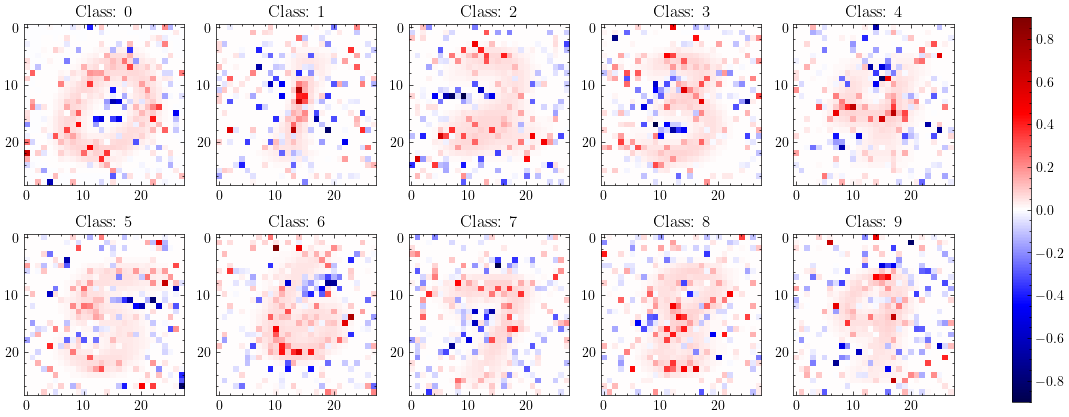

In [15]:
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science'])
fig, ax = plt.subplots(2,5, figsize=(15,5))
ax  = ax.ravel()
ds = conf.train_loader.dataset
for i in range(10):
    mean = 0.1*((ds.data[conf.train_loader.dataset.targets == i])/255.).mean(dim=0)
    im = ax[i].imshow(W[i,:].reshape(28,28).cpu() + mean, vmin=-0.9, vmax=.9, cmap='seismic')
    ax[i].set_title('Class: ' + str(i))
#fig.subplots_adjust(right=0.9)
#cbar_ax = fig.add_axes([0.95, 0.05, 0.05, 0.7])
fig.colorbar(im, ax=ax.tolist())
#plt.tight_layout(pad=0)
plt.savefig('results/act_map.png', dpi=600)